In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from scipy.stats import norm



In [2]:
df = pd.read_csv("../../static/data/transaction_ut.csv")

In [3]:
df

,type,id,status,description,amount,account,balance,direction,class,institution,connection,enrich,transactionDate,postDate,subClass,links
0,transaction,4957bcf6-f18f-43d7-94df-71f44a0bcf32,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,d3de1ca1,22109.56,debit,cash-withdrawal,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:07:36,NaN,"{""account"":""https://au-api.basiq.io/users/6a52..."
1,transaction,0d6e11ab-e28e-4de0-a152-600cc44fb61c,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22309.56,debit,bank-fee,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,"{\title\"":\""\""","\""code\"":\""card\""}"""
2,transaction,323f6d42-a38e-4c46-83d2-6c8f3e999686,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,070c1d68-0ee0-477a-9679-294ea7059939,22312.06,debit,cash-withdrawal,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,NaN,"{\self\"":\""https://au-api.basiq.io/users/bca4b..."
3,transaction,1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22512.06,debit,bank-fee,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,"{\title\"":\""\""","\""code\"":\""card\""}"""
4,transaction,d12df6a2-48b6-4f5f-a718-ccb377aa330c,posted,Transfer Platnm Homeloan 346454,-3852.5,070c1d68-0ee0-477a-9679-294ea7059939,22514.56,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,29/07/2023,2023-07-29T00:00:00Z,"{\title\"":\""Auxiliary Finance and Investment S...","\""code\"":\""641\""}"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,transaction,5b20b38e-6c98-4bfc-97bc-7c9ea2ccc983,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-357.34,credit,transfer,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,26/12/2021,2021-12-16T00:00:00Z,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}"""
285,transaction,1973ec3d-7680-45dd-ac2e-e1eb97c97ea3,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-558.34,credit,transfer,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,14/12/2021,2021-12-14T00:00:00Z,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}"""
286,transaction,8598b570-b80f-42a6-9a52-e73425b3ccd0,posted,TFR Acc14000 TO 12389,-500.0,070c1d68-0ee0-477a-9679-294ea7059939,-759.34,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,13/12/2021,2021-12-13T00:00:00Z,"{\title\"":\""Legal and Accounting Services\""","\""code\"":\""693\""}"""
287,transaction,414279bc-9226-45c5-9722-b18269374373,posted,AGL RETAIL ENERGY LTD (GAS),-160.0,070c1d68-0ee0-477a-9679-294ea7059939,-259.34,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,10/12/2021,2021-12-10T00:00:00Z,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}"""


In [4]:
df = df.sort_values(by="postDate")
# Remove the "Z" from the datetime strings
df["postDate"] = df["postDate"].str.replace("Z", "")

# Convert to datetime with the correct format
df["postDate"] = pd.to_datetime(df["postDate"], format="%Y-%m-%dT%H:%M:%S")

# Extract Year, Month, Day, Hour, Minute, and Second
df["Year"] = df["postDate"].dt.year
df["Month"] = df["postDate"].dt.month
df["Day"] = df["postDate"].dt.day
df["Hour"] = df["postDate"].dt.hour
df["Minute"] = df["postDate"].dt.minute
df["Second"] = df["postDate"].dt.second

In [5]:
df

,type,id,status,description,amount,account,balance,direction,class,institution,...,transactionDate,postDate,subClass,links,Year,Month,Day,Hour,Minute,Second
288,transaction,312885c2-6ff6-4d96-89c9-0bf1b2987f46,posted,AGL RETAIL ENERGY LTD (GAS),-92.0,070c1d68-0ee0-477a-9679-294ea7059939,-99.34,debit,payment,AU00000,...,10/12/2021,2021-12-10 00:00:00,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}""",2021,12,10,0,0,0
287,transaction,414279bc-9226-45c5-9722-b18269374373,posted,AGL RETAIL ENERGY LTD (GAS),-160.0,070c1d68-0ee0-477a-9679-294ea7059939,-259.34,debit,payment,AU00000,...,10/12/2021,2021-12-10 00:00:00,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}""",2021,12,10,0,0,0
286,transaction,8598b570-b80f-42a6-9a52-e73425b3ccd0,posted,TFR Acc14000 TO 12389,-500.0,070c1d68-0ee0-477a-9679-294ea7059939,-759.34,debit,payment,AU00000,...,13/12/2021,2021-12-13 00:00:00,"{\title\"":\""Legal and Accounting Services\""","\""code\"":\""693\""}""",2021,12,13,0,0,0
285,transaction,1973ec3d-7680-45dd-ac2e-e1eb97c97ea3,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-558.34,credit,transfer,AU00000,...,14/12/2021,2021-12-14 00:00:00,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}""",2021,12,14,0,0,0
284,transaction,5b20b38e-6c98-4bfc-97bc-7c9ea2ccc983,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-357.34,credit,transfer,AU00000,...,26/12/2021,2021-12-16 00:00:00,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}""",2021,12,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,transaction,d12df6a2-48b6-4f5f-a718-ccb377aa330c,posted,Transfer Platnm Homeloan 346454,-3852.5,070c1d68-0ee0-477a-9679-294ea7059939,22514.56,debit,payment,AU00000,...,29/07/2023,2023-07-29 00:00:00,"{\title\"":\""Auxiliary Finance and Investment S...","\""code\"":\""641\""}""",2023,7,29,0,0,0
3,transaction,1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22512.06,debit,bank-fee,AU00000,...,3/08/2023,2023-08-03 00:00:00,"{\title\"":\""\""","\""code\"":\""card\""}""",2023,8,3,0,0,0
2,transaction,323f6d42-a38e-4c46-83d2-6c8f3e999686,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,070c1d68-0ee0-477a-9679-294ea7059939,22312.06,debit,cash-withdrawal,AU00000,...,3/08/2023,2023-08-03 00:00:00,NaN,"{\self\"":\""https://au-api.basiq.io/users/bca4b...",2023,8,3,0,0,0
1,transaction,0d6e11ab-e28e-4de0-a152-600cc44fb61c,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22309.56,debit,bank-fee,AU00000,...,3/08/2023,2023-08-03 00:00:00,"{\title\"":\""\""","\""code\"":\""card\""}""",2023,8,3,0,0,0


In [6]:
columns_to_keep = ["postDate", "balance"]
df = df[columns_to_keep]
df['postDate'] = pd.to_datetime(df['postDate']).dt.date
df = df.groupby('postDate').agg({'balance': 'min'}).reset_index()

/var/folders/ll/5s61gq812pq8xwpl67shn_280000gn/T/ipykernel_16214/2051230037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['postDate'] = pd.to_datetime(df['postDate']).dt.date


In [7]:
df

,postDate,balance
0,2021-12-10,-259.34
1,2021-12-13,-759.34
2,2021-12-14,-558.34
3,2021-12-16,-357.34
4,2021-12-26,-759.84
...,...,...
158,2023-07-16,18474.06
159,2023-07-17,18675.06
160,2023-07-28,26367.06
161,2023-07-29,22514.56


In [8]:
# Save the DataFrame to a new CSV file if needed
df.to_csv('modified_transactions_data.csv', index=False)

In [9]:
df['postDate'] = pd.to_datetime(df['postDate'])
df.set_index('postDate', inplace=True)

# Then, resample the DataFrame with daily frequency and forward-fill missing values
df = df.resample('D').ffill()

# Reset the index to have 'postDate' as a regular column again
df.reset_index(inplace=True)

In [10]:
df

,postDate,balance
0,2021-12-10,-259.34
1,2021-12-11,-259.34
2,2021-12-12,-259.34
3,2021-12-13,-759.34
4,2021-12-14,-558.34
...,...,...
597,2023-07-30,22514.56
598,2023-07-31,22514.56
599,2023-08-01,22514.56
600,2023-08-02,22514.56


<Axes: >

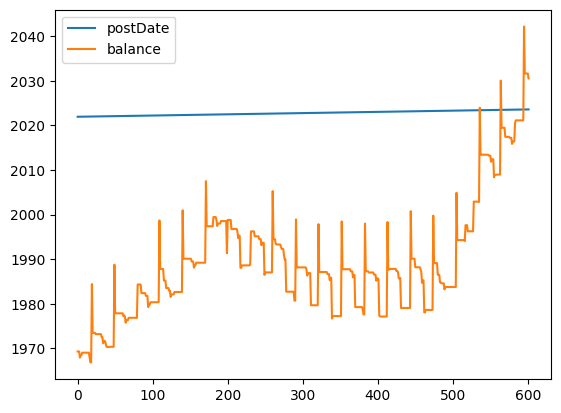

In [11]:
df.plot()

In [12]:
df.set_index('postDate', inplace=True)

train_size = int(len(df) * 0.8)
train_data = df['balance'][:train_size]
test_data = df['balance'][train_size:]

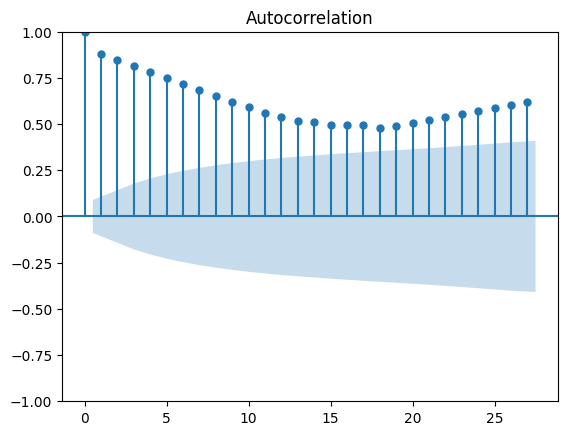

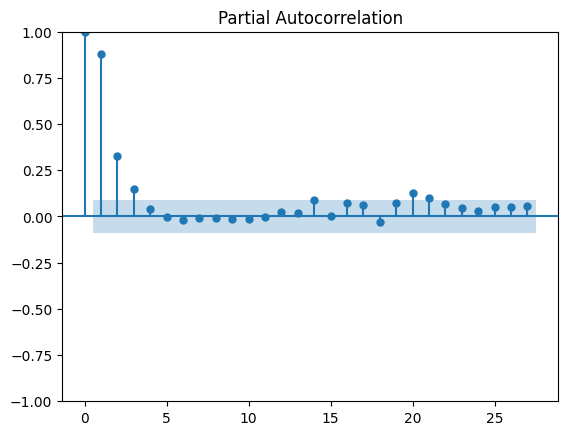

In [13]:
#inserted
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train_data)
pacf_original = plot_pacf(train_data)

In [14]:
#inserted
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_data)
print(f'p-value: {adf_test[1]}')

p-value: 0.009081597283628335


<Axes: xlabel='postDate'>

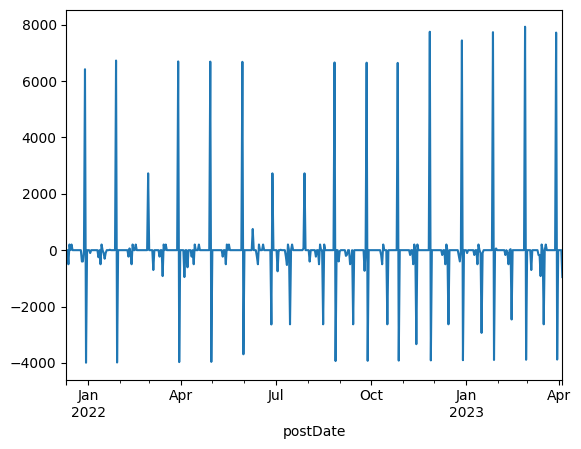

In [15]:
df_train_diff = train_data.diff().dropna()
df_train_diff.plot()

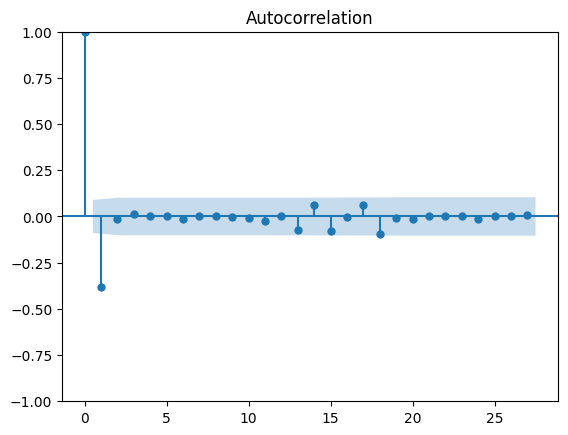

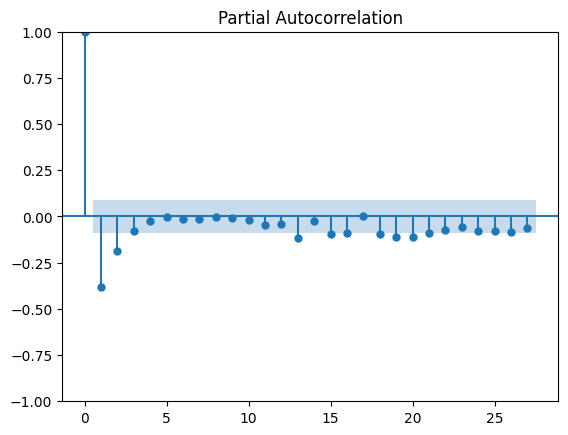

In [16]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [17]:
import pmdarima as pm
auto_arima = pm.auto_arima(train_data, stepwise=False, seasonal=False)
auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
p = 0  # Autoregressive order
d = 2  # Integrated order (differencing)
q = 2 # Moving Average order

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
import itertools
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
import statsmodels.api as sm


for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))       

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
import datetime
current = datetime.date.today() 
start= current - datetime.timedelta(days=180)
end = current + datetime.timedelta(days=180)
print(start)
print(end)

In [ ]:
pred = results.get_prediction(start=pd.to_datetime(start), end=pd.to_datetime(end),dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
print(pred.predicted_mean)

In [ ]:
pred.predicted_mean.plot( label='One-step ahead Forecast', alpha=.7)

plt.legend()

plt.show()

In [ ]:
df_forecasted = pred.predicted_mean
df_truth = df['2023-03-07':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Define the number of months to forecast ahead
forecast_months = 365
forecast = model_fit.forecast(forecast_months)

# Create an index for the forecasted days
forecast_index = pd.date_range(start=df.index[0], periods=forecast_months, freq='D')

In [ ]:
print("Forecasted Balances for the Next 12 Months:")
print(forecast)


In [ ]:
# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the z-score for the desired confidence level
z_score = norm.ppf((1 + confidence_level) / 2)

# Calculate the standard error of the mean (assuming normal distribution)
std_error = np.std(forecast) / np.sqrt(len(forecast))

# Calculate the margin of error
margin_of_error = z_score * std_error

# Calculate the lower and upper bounds for the confidence intervals
lower_bound = forecast - margin_of_error
upper_bound = forecast + margin_of_error

# Create a DataFrame with the forecasted values and their confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

# Print the DataFrame
print(forecast_df)
#inserted
print(std_error)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df, label='Forecasted Balances')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.fill_between(forecast_df.index, forecast_df['Lower Bound'], forecast_df['Upper Bound'], alpha=0.2, color='b')
plt.title('Forecasted Balances for the Next 12 Months')
plt.legend(['AVG predicted balance','Lower Bound','Upper bound'])
plt.grid(True)
plt.show()